In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/transaction_anomalies_dataset.csv')
data.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


## Q1

In [ ]:
print(data.isnull().sum())

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64


In [ ]:
data.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


## .2: Check distribution of transactions amount in the data

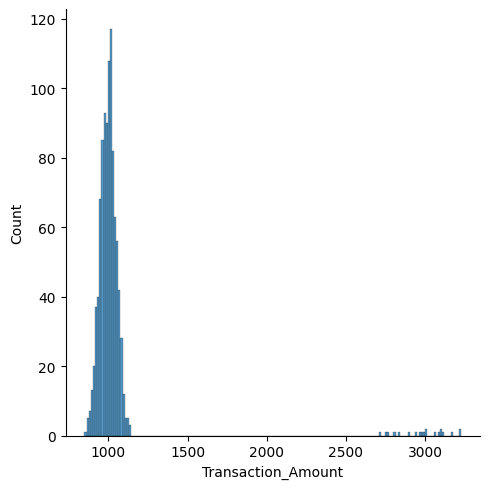

In [ ]:
sns.displot(data['Transaction_Amount'])
plt.show()

Q.3: Check distribution of transactions amount by account type

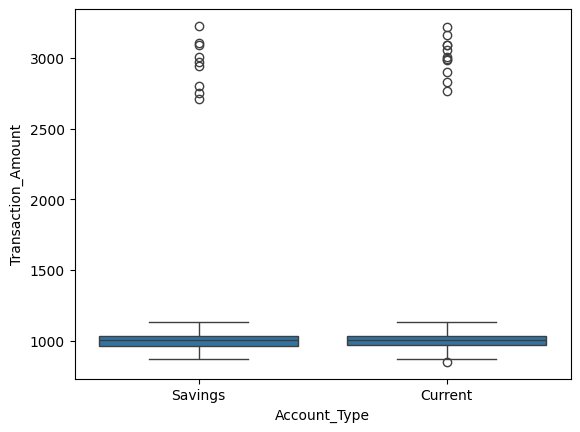

In [ ]:
sns.boxplot(x='Account_Type',y='Transaction_Amount',data=data)
plt.show()

## Q.4: Check the average transaction amount by age

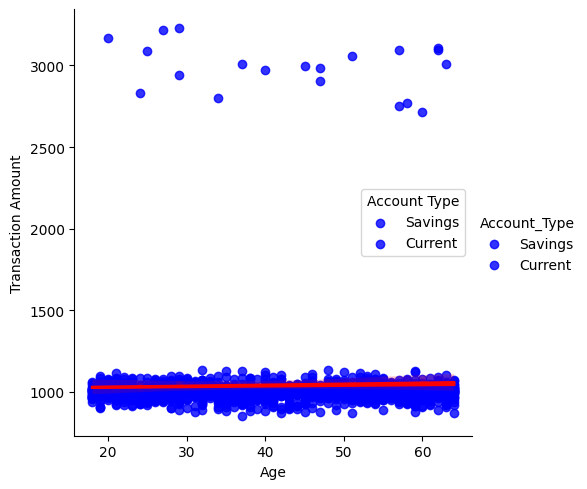

In [ ]:
custom_palette = {'Savings': 'orange', 'Current': 'yellow'}
sns.lmplot(x='Age', y='Transaction_Amount', data=data, hue='Account_Type', palette=custom_palette, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.set_palette(custom_palette.values())
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.legend(title='Account Type')
plt.show()


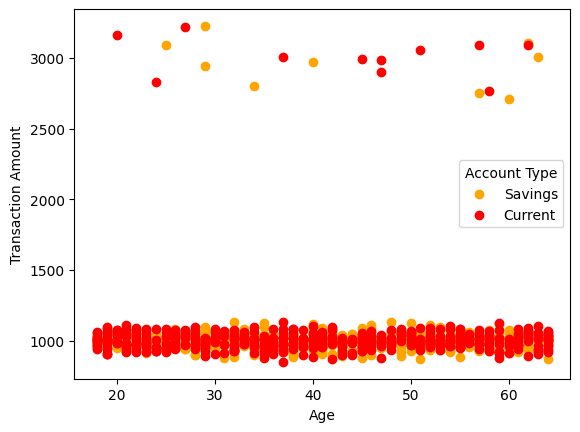

In [ ]:
custom_palette = {'Savings': 'orange', 'Current': 'red'}
for account_type, color in custom_palette.items():
    plt.scatter(data[data['Account_Type'] == account_type]['Age'],
                data[data['Account_Type'] == account_type]['Transaction_Amount'],
                label=account_type, color=color)
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.legend(title='Account Type')
plt.show()


## Q.5: Check the count of transactions by day of the week

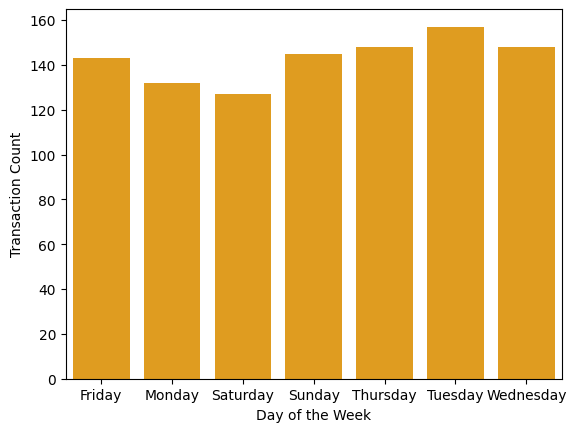

In [ ]:
tran_by_week = data.groupby('Day_of_Week')['Transaction_Amount'].count()
tran_by_week = pd.DataFrame(tran_by_week)
sns.barplot(x=tran_by_week.index, y='Transaction_Amount',data= tran_by_week)
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.show()

## Q.6: Check the correlation between all the columns in the data

<ipython-input-12-cbfe0d1c753f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


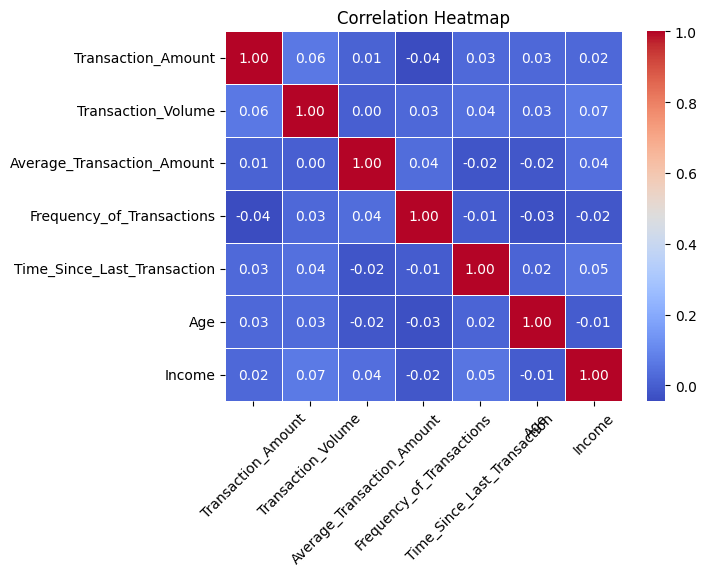

In [ ]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
data.columns

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Day_of_Week', 'Time_of_Day', 'Age',
       'Gender', 'Income', 'Account_Type'],
      dtype='object')

In [ ]:
trans = data[['Transaction_Amount',"Average_Transaction_Amount"]]

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
clf = IsolationForest(contamination=0.3)
clf.fit(trans)
predictions = clf.predict(trans)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
predictions

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
        1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1,  1

In [ ]:
anomolies = np.where(predictions<0)
anomolies

(array([  3,   9,  13,  14,  17,  20,  21,  22,  27,  35,  37,  38,  39,
         44,  48,  51,  53,  55,  56,  58,  59,  60,  66,  71,  78,  84,
         87,  88,  91,  94,  97,  99, 106, 109, 110, 111, 112, 114, 115,
        121, 125, 127, 137, 139, 143, 145, 147, 151, 152, 155, 156, 158,
        163, 174, 176, 179, 180, 188, 189, 193, 194, 198, 200, 203, 204,
        208, 210, 216, 217, 218, 224, 226, 228, 229, 230, 234, 238, 239,
        240, 241, 244, 246, 248, 249, 250, 251, 252, 260, 264, 277, 278,
        279, 284, 285, 290, 293, 294, 295, 301, 305, 307, 310, 314, 316,
        317, 320, 322, 330, 336, 337, 340, 346, 348, 349, 350, 355, 356,
        359, 360, 363, 365, 372, 373, 374, 381, 382, 385, 390, 391, 399,
        400, 410, 416, 417, 422, 426, 434, 438, 439, 441, 447, 450, 451,
        456, 462, 466, 468, 474, 478, 480, 481, 484, 487, 493, 494, 495,
        497, 507, 508, 536, 537, 539, 541, 546, 550, 554, 557, 558, 559,
        561, 563, 564, 565, 567, 568, 570, 573, 575

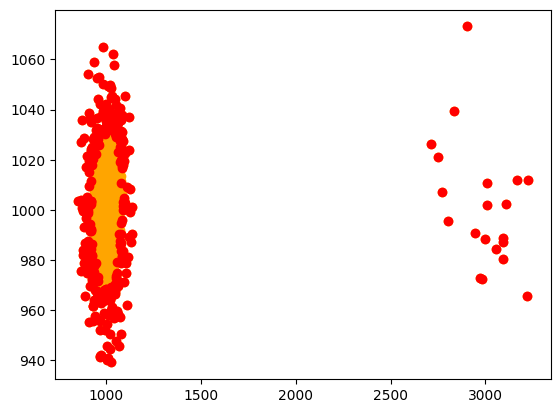

In [ ]:
plt.scatter(trans.iloc[:,0],trans.iloc[:,1])
x = trans.values
plt.scatter(x[anomolies,0],x[anomolies,1],color='r')
plt.show()